Here's a breakdown of what each column likely represents:

- 0, 1, 2,...: These are likely the index or a unique identifier for each data entry.
- ANSI: This indicates the standard to which the steel grade conforms (American National Standards Institute).
- D8894772B88F495093C43AF905AB6373, etc.: This appears to be a unique identification code for each specific record.
- Steel SAE 1015, Steel SAE 1020, Steel SAE 1022, Steel SAE 1030: This specifies the material type and grade according to the Society of Automotive Engineers (SAE) classification system. The numbers usually indicate the carbon content.
- as-rolled, normalized, annealed: This describes the heat treatment process applied to the steel, which significantly affects its mechanical properties.
- 421, 424, 386, etc. (Su): This likely represents the Ultimate Tensile Strength (Su), usually measured in MPa (MegaPascals). It's the maximum stress the material can withstand before breaking.
- 314, 324, 284, etc. (Sy): This probably represents the Yield Strength (Sy), also in MPa. It's the stress at which the material begins to deform permanently.
- 39.0, 37.0, 37.0, etc. (A5): This most likely represents the Elongation at Fracture (A5), often expressed as a percentage. It indicates the ductility of the material, or how much it can be stretched before breaking.
- 126.0, 121.0, 111.0, etc. (Bhn): This likely represents the Brinell Hardness Number (Bhn), a measure of the material's resistance to indentation.
- 207000, 207000, 207000, etc. (E): This probably represents the Young's Modulus (E) or modulus of elasticity, usually in MPa. It's a measure of the material's stiffness.
- 79000, 79000, 79000, etc. (G): This likely represents the Shear Modulus (G) or modulus of rigidity, also in MPa. It's a measure of the material's resistance to shear stress.
- 0.3, 0.3, 0.3, etc. (mu): This probably represents Poisson's Ratio (¬µ), a dimensionless value that describes the ratio of transverse strain to axial strain under uniaxial stress.
- 7860, 7860, 7860, etc. (Ro): This most likely represents the Density (œÅ or Ro) of the material, usually in kg/m¬≥.
- NaN, NaN, NaN, etc. (pH): This column seems to be related to pH, which is a measure of acidity or alkalinity. The "NaN" values suggest this data might be missing or not applicable to these specific entries.
- NaN, NaN, NaN, etc. (Desc): This column likely stands for Description. The "NaN" values indicate that there's no specific textual description provided for these entries.
- NaN, NaN, NaN, etc. (HV): This probably represents the Vickers Hardness (HV), another measure of hardness. The "NaN" values suggest this data is missing for these entries.
- In essence, this dataset provides a structured overview of the mechanical and physical properties of various SAE steel grades under different heat treatment conditions. This kind of data is incredibly valuable for engineers and material scientists in selecting the appropriate steel for specific applications based on strength, ductility, hardness, and other crucial factors. The inclusion of heat treatment information further highlights how processing can tailor the material's characteristics.

# Task 1: Initial Exploration & Summary


In [3]:

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
data1 = pd.read_csv('Data.csv')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Std             1552 non-null   object 
 1   ID              1552 non-null   object 
 2   Material        1552 non-null   object 
 3   Heat treatment  802 non-null    object 
 4   Su              1552 non-null   int64  
 5   Sy              1552 non-null   object 
 6   A5              1346 non-null   float64
 7   Bhn             463 non-null    float64
 8   E               1552 non-null   int64  
 9   G               1552 non-null   int64  
 10  mu              1552 non-null   float64
 11  Ro              1552 non-null   int64  
 12  pH              193 non-null    float64
 13  Desc            981 non-null    object 
 14  HV              165 non-null    float64
dtypes: float64(5), int64(4), object(6)
memory usage: 182.0+ KB


In [30]:
data1.head(20)

Std                                ID        Material     Heat treatment  \
0   ANSI  D8894772B88F495093C43AF905AB6373  Steel SAE 1015          as-rolled   
1   ANSI  05982AC66F064F9EBC709E7A4164613A  Steel SAE 1015         normalized   
2   ANSI  356D6E63FF9A49A3AB23BF66BAC85DC3  Steel SAE 1015           annealed   
3   ANSI  1C758F8714AC4E0D9BD8D8AE1625AECD  Steel SAE 1020          as-rolled   
4   ANSI  DCE10036FC1946FC8C9108D598D116AD  Steel SAE 1020         normalized   
5   ANSI  2EC038241908434FA714FEEBE24DDEFE  Steel SAE 1020           annealed   
6   ANSI  356B183DD9E34A1C80A5028D43B9E149  Steel SAE 1022          as-rolled   
7   ANSI  95CB82FA86314D8490932A9E740744E3  Steel SAE 1022         normalized   
8   ANSI  942333E2D11B4C2CA0B9DFD6D1CE38E0  Steel SAE 1022           annealed   
9   ANSI  5E035DD0692F47E3A92EB298101AA124  Steel SAE 1030          as-rolled   
10  ANSI  8C9BE76E417841C3B821D4776B498039  Steel SAE 1030         normalized   
11  ANSI  39E235137DD74F3CA35EA024AFD04964  Steel SAE 1030           annealed   
12  ANSI  436484F7350147F7A2982D1410FB03CC  Steel SAE 1030  tempered at 400 F   
13  ANSI  65BF7EFEEAE24296AC60198D15FCEFD6  Steel SAE 1040          as-rolled   
14  ANSI  E9134C5FCB8C41569B3B50315A4D13A5  Steel SAE 1040         normalized   
15  ANSI  CEEFEC39D52C4CBC9FD7A599BF6E4078  Steel SAE 1040           annealed   
16  ANSI  C3F57A34049943E98579CCEF761EE90D  Steel SAE 1040  tempered at 400 F   
17  ANSI  6BB34C63B60749ADA2E4522BE8B284E2  Steel SAE 1050          as-rolled   
18  ANSI  5D7646BB490A4A41A0C059C46224189F  Steel SAE 1050         normalized   
19  ANSI  4DD78B764534417698C437FBECD1B914  Steel SAE 1050           annealed   

     Su   Sy    A5    Bhn       E      G   mu    Ro     pH Desc  HV  
0   421  314  39.0  126.0  207000  79000  0.3  7860    NaN  NaN NaN  
1   424  324  37.0  121.0  207000  79000  0.3  7860    NaN  NaN NaN  
2   386  284  37.0  111.0  207000  79000  0.3  7860    NaN  NaN NaN  
3   448  331  36.0  143.0  207000  79000  0.3  7860    NaN  NaN NaN  
4   441  346  35.8  131.0  207000  79000  0.3  7860  550.0  NaN NaN  
5   395  295  36.5  111.0  207000  79000  0.3  7860    NaN  NaN NaN  
6   503  359  35.0  149.0  207000  79000  0.3  7860    NaN  NaN NaN  
7   483  359  34.0  143.0  207000  79000  0.3  7860    NaN  NaN NaN  
8   450  317  35.0  137.0  207000  79000  0.3  7860    NaN  NaN NaN  
9   552  345  32.0  179.0  207000  79000  0.3  7860    NaN  NaN NaN  
10  517  345  32.0  149.0  207000  79000  0.3  7860    NaN  NaN NaN  
11  464  341  31.0  126.0  207000  79000  0.3  7860    NaN  NaN NaN  
12  848  648  17.0  495.0  207000  79000  0.3  7860    NaN  NaN NaN  
13  621  414  25.0  201.0  207000  79000  0.3  7860    NaN  NaN NaN  
14  590  374  28.0  170.0  207000  79000  0.3  7860    NaN  NaN NaN  
15  519  353  30.0  149.0  207000  79000  0.3  7860  310.0  NaN NaN  
16  779  593  19.0  262.0  207000  79000  0.3  7860    NaN  NaN NaN  
17  724  414  20.0  229.0  207000  79000  0.3  7860    NaN  NaN NaN  
18  748  427  20.0  217.0  207000  79000  0.3  7860    NaN  NaN NaN  
19  636  365  23.7  187.0  207000  79000  0.3  7860  390.0  NaN NaN

In [35]:

data1.isna().sum()

Std                  0
ID                   0
Material             0
Heat treatment     750
Su                   0
Sy                   0
A5                 206
Bhn               1089
E                    0
G                    0
mu                   0
Ro                   0
pH                1359
Desc               571
HV                1387
dtype: int64

# 1.Count materials and heat treatment types

In [4]:
# ‚úÖ Total number of unique materials
num_materials = data1['Material'].nunique()
print(f"Total unique materials: {num_materials}")


Total unique materials: 1225


In [5]:
# ‚úÖ Total number of unique heat treatment types (excluding NaNs)
num_heat_treatments = data1['Heat treatment'].nunique(dropna=True)
print(f"Total unique heat treatment types: {num_heat_treatments}")

Total unique heat treatment types: 44


# 2.Check for any missing or inconsistent data values.

In [38]:
# ‚úÖ Missing values per column
missing_data = data1.isnull().sum()
print("\nMissing values per column:")
print(missing_data)


Missing values per column:
Std                  0
ID                   0
Material             0
Heat treatment     750
Su                   0
Sy                   0
A5                 206
Bhn               1089
E                    0
G                    0
mu                   0
Ro                   0
pH                1359
Desc               571
HV                1387
dtype: int64


In [6]:
#  Check for inconsistent entries in 'Sy' column (non-numeric)
non_numeric_sy = data1[pd.to_numeric(data1['Sy'], errors='coerce').isnull()]['Sy'].unique()
print(f"\nInconsistent 'Sy' entries: {non_numeric_sy}")


Inconsistent 'Sy' entries: ['280 max' '240 max' '210 max' '250 max' '225 max']


#### Handling Missing data

In [7]:
import re

# Custom function to extract numeric part from string
def extract_numeric_sy(val):
    if isinstance(val, str):
        match = re.search(r"\d+", val)
        return int(match.group()) if match else None
    return val  # if already numeric

# Apply the function
data1['Sy'] = data1['Sy'].apply(extract_numeric_sy)


In [8]:
data1['heat_treated'] = data1['Heat treatment'].notnull().astype(int)


In [9]:
numeric_cols = ['Su', 'Sy', 'A5', 'Bhn', 'E', 'G', 'mu', 'Ro', 'pH', 'HV']
data1[numeric_cols] = data1[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [10]:
data1['A5'] = data1['A5'].fillna(data1['A5'].median())
data1_cleaned = data1.copy()  

In [11]:
data1_cleaned.head(20)

Std                                ID        Material     Heat treatment  \
0   ANSI  D8894772B88F495093C43AF905AB6373  Steel SAE 1015          as-rolled   
1   ANSI  05982AC66F064F9EBC709E7A4164613A  Steel SAE 1015         normalized   
2   ANSI  356D6E63FF9A49A3AB23BF66BAC85DC3  Steel SAE 1015           annealed   
3   ANSI  1C758F8714AC4E0D9BD8D8AE1625AECD  Steel SAE 1020          as-rolled   
4   ANSI  DCE10036FC1946FC8C9108D598D116AD  Steel SAE 1020         normalized   
5   ANSI  2EC038241908434FA714FEEBE24DDEFE  Steel SAE 1020           annealed   
6   ANSI  356B183DD9E34A1C80A5028D43B9E149  Steel SAE 1022          as-rolled   
7   ANSI  95CB82FA86314D8490932A9E740744E3  Steel SAE 1022         normalized   
8   ANSI  942333E2D11B4C2CA0B9DFD6D1CE38E0  Steel SAE 1022           annealed   
9   ANSI  5E035DD0692F47E3A92EB298101AA124  Steel SAE 1030          as-rolled   
10  ANSI  8C9BE76E417841C3B821D4776B498039  Steel SAE 1030         normalized   
11  ANSI  39E235137DD74F3CA35EA024AFD04964  Steel SAE 1030           annealed   
12  ANSI  436484F7350147F7A2982D1410FB03CC  Steel SAE 1030  tempered at 400 F   
13  ANSI  65BF7EFEEAE24296AC60198D15FCEFD6  Steel SAE 1040          as-rolled   
14  ANSI  E9134C5FCB8C41569B3B50315A4D13A5  Steel SAE 1040         normalized   
15  ANSI  CEEFEC39D52C4CBC9FD7A599BF6E4078  Steel SAE 1040           annealed   
16  ANSI  C3F57A34049943E98579CCEF761EE90D  Steel SAE 1040  tempered at 400 F   
17  ANSI  6BB34C63B60749ADA2E4522BE8B284E2  Steel SAE 1050          as-rolled   
18  ANSI  5D7646BB490A4A41A0C059C46224189F  Steel SAE 1050         normalized   
19  ANSI  4DD78B764534417698C437FBECD1B914  Steel SAE 1050           annealed   

     Su   Sy    A5    Bhn       E      G   mu    Ro     pH Desc  HV  \
0   421  314  39.0  126.0  207000  79000  0.3  7860    NaN  NaN NaN   
1   424  324  37.0  121.0  207000  79000  0.3  7860    NaN  NaN NaN   
2   386  284  37.0  111.0  207000  79000  0.3  7860    NaN  NaN NaN   
3   448  331  36.0  143.0  207000  79000  0.3  7860    NaN  NaN NaN   
4   441  346  35.8  131.0  207000  79000  0.3  7860  550.0  NaN NaN   
5   395  295  36.5  111.0  207000  79000  0.3  7860    NaN  NaN NaN   
6   503  359  35.0  149.0  207000  79000  0.3  7860    NaN  NaN NaN   
7   483  359  34.0  143.0  207000  79000  0.3  7860    NaN  NaN NaN   
8   450  317  35.0  137.0  207000  79000  0.3  7860    NaN  NaN NaN   
9   552  345  32.0  179.0  207000  79000  0.3  7860    NaN  NaN NaN   
10  517  345  32.0  149.0  207000  79000  0.3  7860    NaN  NaN NaN   
11  464  341  31.0  126.0  207000  79000  0.3  7860    NaN  NaN NaN   
12  848  648  17.0  495.0  207000  79000  0.3  7860    NaN  NaN NaN   
13  621  414  25.0  201.0  207000  79000  0.3  7860    NaN  NaN NaN   
14  590  374  28.0  170.0  207000  79000  0.3  7860    NaN  NaN NaN   
15  519  353  30.0  149.0  207000  79000  0.3  7860  310.0  NaN NaN   
16  779  593  19.0  262.0  207000  79000  0.3  7860    NaN  NaN NaN   
17  724  414  20.0  229.0  207000  79000  0.3  7860    NaN  NaN NaN   
18  748  427  20.0  217.0  207000  79000  0.3  7860    NaN  NaN NaN   
19  636  365  23.7  187.0  207000  79000  0.3  7860  390.0  NaN NaN   

    heat_treated  
0              1  
1              1  
2              1  
3              1  
4              1  
5              1  
6              1  
7              1  
8              1  
9              1  
10             1  
11             1  
12             1  
13             1  
14             1  
15             1  
16             1  
17             1  
18             1  
19             1

In [12]:
numeric_cols = ['Su', 'Sy', 'A5', 'Bhn', 'E', 'G', 'mu', 'Ro', 'pH', 'HV']
data1_cleaned[numeric_cols] = data1_cleaned[numeric_cols].apply(pd.to_numeric, errors='coerce')


# 3.Summarize key statistics of mechanical properties like Su (ultimate tensile strength), Sy (yield strength), and A5 (elongation at break).

In [13]:
# ‚úÖ Summary statistics for key mechanical properties
mechanical_cols = ['Su', 'Sy', 'A5']
print("\nSummary statistics for Su, Sy, and A5:")
print(data1_cleaned[mechanical_cols].describe())


Summary statistics for Su, Sy, and A5:
                Su           Sy           A5
count  1552.000000  1552.000000  1552.000000
mean    572.753222   387.010309    18.887500
std     326.834927   289.482497    11.622757
min      69.000000    28.000000     0.500000
25%     340.000000   205.000000    12.000000
50%     500.000000   305.000000    16.000000
75%     705.000000   470.000000    22.000000
max    2220.000000  2048.000000    70.000000


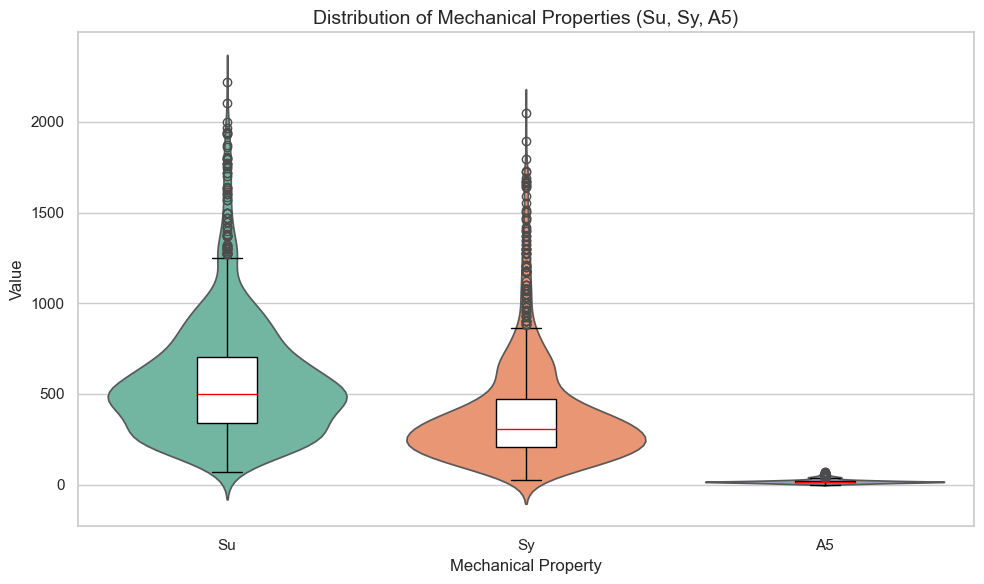

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Select relevant columns
data = data1_cleaned[['Su', 'Sy', 'A5']]

# Melt the DataFrame to long format for seaborn
data_melted = data.melt(var_name='Property', value_name='Value')

# Create plot
plt.figure(figsize=(10, 6))

# Violin plot (with no internal box for clarity)
sns.violinplot(x='Property', y='Value', hue='Property', data=data_melted,
               palette='Set2', legend=False, inner=None)

# Boxplot overlay
sns.boxplot(x='Property', y='Value', data=data_melted, width=0.2,
            boxprops={'facecolor': 'white', 'edgecolor': 'black'},
            whiskerprops={'color': 'black'},
            capprops={'color': 'black'},
            medianprops={'color': 'red'})

# Titles and labels
plt.title('Distribution of Mechanical Properties (Su, Sy, A5)', fontsize=14)
plt.xlabel('Mechanical Property', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.tight_layout()
plt.show()


# Capping Outliers Using Winsorization(5th - 95th Percentile)

In [15]:

def cap_outliers_percentile(df, columns, lower_pct=0.05, upper_pct=0.95):
    df_capped = df.copy()
    for col in columns:
        lower_bound = df_capped[col].quantile(lower_pct)
        upper_bound = df_capped[col].quantile(upper_pct)
        df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)
    return df_capped

# Apply to Su, Sy, A5
columns_to_cap = ['Su', 'Sy', 'A5']
data_capped_percentile = cap_outliers_percentile(data1_cleaned, columns_to_cap)

# Check value caps
for col in columns_to_cap:
    print(f"{col} - Before: {data1_cleaned[col].min()} to {data1_cleaned[col].max()}")
    print(f"{col} - After : {data_capped_percentile[col].min()} to {data_capped_percentile[col].max()}\n")


Su - Before: 69 to 2220
Su - After : 179 to 1226

Sy - Before: 28 to 2048
Sy - After : 97.0 to 979.8999999999996

A5 - Before: 0.5 to 70.0
A5 - After : 4.0 to 45.0



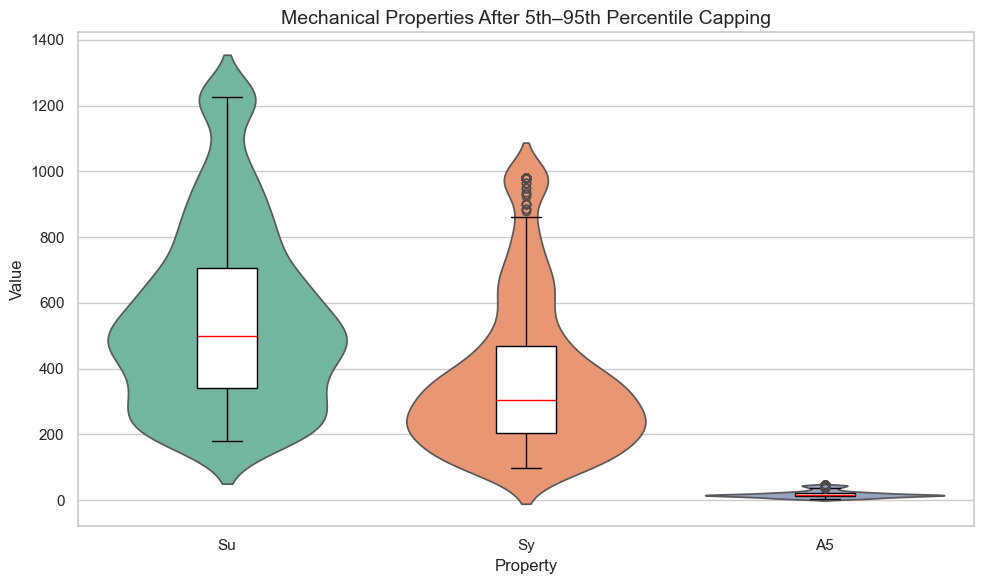

In [16]:
data_melted_percentile = data_capped_percentile[columns_to_cap].melt(var_name='Property', value_name='Value')

plt.figure(figsize=(10, 6))
sns.violinplot(x='Property', y='Value', hue='Property', data=data_melted_percentile,
               palette='Set2', legend=False, inner=None)
sns.boxplot(x='Property', y='Value', data=data_melted_percentile, width=0.2,
            boxprops={'facecolor': 'white', 'edgecolor': 'black'},
            whiskerprops={'color': 'black'},
            capprops={'color': 'black'},
            medianprops={'color': 'red'})

plt.title('Mechanical Properties After 5th‚Äì95th Percentile Capping', fontsize=14)
plt.tight_layout()
plt.show()


In [17]:
data_capped_percentile.shape

(1552, 16)

# Insights from the Plot (After 5th‚Äì95th Percentile Capping)

This plot shows the **distribution of three key mechanical properties** ‚Äî Ultimate Tensile Strength (Su), Yield Strength (Sy), and Elongation at Break (A5) ‚Äî after we capped extreme outliers using the **5th and 95th percentiles**.

---

## Property-wise Interpretation:

### **1. Su (Ultimate Tensile Strength)**
- **Range (after capping)**: ~190 MPa to ~1240 MPa.
- **Distribution shape**: Su is **fairly spread out**, showing materials ranging from lower to very high strength.
- The **box** in the center represents most materials clustering between **~340 to ~705 MPa**.
- This wide range implies you can **choose materials for both low-strength and high-strength applications** depending on your load requirements.

### **2. Sy (Yield Strength)**
- **Range (after capping)**: ~120 MPa to ~980 MPa.
- Similar to Su, but more concentrated in the **~200 to ~470 MPa** band.
- It suggests **many materials begin to permanently deform** under relatively moderate stress ‚Äî which is critical when you want to avoid plastic deformation in your design.

### **3. A5 (Elongation at Break)**
- **Range (after capping)**: ~5% to ~30%.
- The distribution is **narrower and more skewed**, meaning:
  - Most materials **aren‚Äôt extremely ductile**, but some have decent stretchability.
  - Important for applications where **formability or flexibility** is required before fracture (like metal forming or crash zones).

---

## Engineering Takeaways:
- **Su and Sy** both show a **wide variety** of steel grades, suitable for both **light-duty** and **high-stress** components.
- **A5** helps you distinguish between **brittle vs. ductile options**.
- The **box overlay** makes it easy to identify where **most common material values lie** ‚Äî perfect for shortlisting candidate materials during selection.

---

Let me know if you'd like this visual exported as a **report slide**, or if you want to explore **correlations or clustering** between these properties!


# Task 2: Groupwise Comparison


#  Step-by-Step Plan: Grouping and Analyzing Material Properties

We'll analyze the dataset by grouping it based on:

##  Grouping Criteria:
- **Material Type**:  
  Examples:  
  - *Steel SAE 1015*  
  - *Steel SAE 1045*

- **Heat Treatment Condition**:  
  Examples:  
  - *As-rolled*  
  - *Normalized*  
  - *Annealed*

##  Properties to Analyze (Compute Mean for Each Group):
- **Su** *(Ultimate Tensile Strength)* ‚Üí üî© *Strength*
- **A5** *(Elongation at Break)* ‚Üí üßµ *Ductility*
- **BHN** or **HV** *(Brinell or Vickers Hardness)* ‚Üí üõ°Ô∏è *Resistance to Indentation*

This analysis will help us understand how **material type** and **processing methods** affect key mechanical properties.


In [20]:


# Group by Material type
material_grouped = data_capped_percentile.groupby('Material')[['Su', 'A5', 'Bhn', 'HV']].mean().sort_values(by='Su', ascending=False)

# Group by Heat treatment
treatment_grouped = data_capped_percentile.groupby('Heat treatment')[['Su', 'A5', 'Bhn', 'HV']].mean().sort_values(by='Su', ascending=False)

# Show top 5 in each group
print(" Average by Material Type:")
print(material_grouped.head())

print("\n Average by Heat Treatment:")
print(treatment_grouped.head())


 Average by Material Type:
                    Su    A5    Bhn     HV
Material                                  
BS 525A60       1226.0   6.0    NaN    NaN
BS 735A51       1226.0   6.0    NaN    NaN
CSN 16640       1226.0  16.0    NaN  510.0
Steel SAE 8660  1226.0  13.0  460.0    NaN
Steel SAE 8640  1226.0  10.0  505.0    NaN

 Average by Heat Treatment:
                            Su         A5         Bhn     HV
Heat treatment                                              
Full-hard          1226.000000   6.000000         NaN    NaN
nitro-case-hard.   1226.000000  12.500000         NaN  630.0
tempered at 800 F  1226.000000  10.500000  465.000000    NaN
3/4-hard           1207.000000   8.500000         NaN    NaN
tempered at 400 F  1173.655172  10.482759  462.655172    NaN


# üîé What to Look For in the Output

## üìÇ By Material Type
- Do some steel grades (like **SAE 1045**) consistently show:
  - Higher **Su** (Ultimate Tensile Strength)?
  - Higher **A5** (Elongation at Break ‚Üí Ductility)?
- Are some materials **naturally harder** (higher BHN/HV) even *without heat treatment*?

## üî• By Heat Treatment
- How does **annealing** affect **A5** compared to **as-rolled** condition?
- Does **normalizing**:
  - Increase **Su**?
  - Decrease **A5** (i.e., reduce ductility)?
- Are there any treatments that:
  - Increase **strength (Su)** ‚úÖ
  - But reduce **hardness (BHN/HV)** ‚ùå?

---

# üß† Engineering Insight Potential

- ‚úÖ If you need **tough and formable steel**, look for:
  - High **A5**
  - Moderate **Su**
  - Under a specific **heat treatment**

- üèóÔ∏è If you‚Äôre designing a **load-bearing component**, target:
  - High **Su**
  - High **BHN/HV**

‚öñÔ∏è This helps you avoid:
- **Overengineering** (too expensive or overkill)
- **Underperforming** choices (too soft or weak for the application)


# üîß 1. Insights by Material Type

| Material           | Avg Su (MPa) | Avg A5 (%) | Hardness |
|-------------------|--------------|------------|----------|
| BS 525A60         | 1226         | 6          | -        |
| BS 735A51         | 1226         | 6          | -        |
| CSN 16640         | 1226         | 16         | HV: 510  |
| SAE 8660          | 1226         | 13         | BHN: 460 |
| SAE 8640          | 1226         | 10         | BHN: 505 |

### üõ†Ô∏è Engineering Takeaways:
- All these materials show **very high tensile strength (Su ‚âà 1226 MPa)** ‚Üí ideal for **high-stress applications**.
- **Ductility (A5)** varies significantly:
  - **BS grades** have **low ductility (A5 = 6%)** ‚Üí strong but more brittle.
  - **SAE 8660** and **CSN 16640** offer a better **strength-ductility tradeoff** ‚Üí good for parts needing both **strength and toughness** (e.g., gears, shafts).
- **Hardness** data (BHN/HV) confirms strong surface resistance, especially in **CSN 16640** and **SAE 8640**.

---

# üî• 2. Insights by Heat Treatment

| Heat Treatment        | Avg Su (MPa) | Avg A5 (%) | Hardness |
|-----------------------|--------------|------------|----------|
| Full-hard             | 1226         | 6          | -        |
| Nitro-case-hardened   | 1226         | 12.5       | HV: 630  |
| Tempered at 800¬∞F     | 1226         | 10.5       | BHN: 465 |
| 3/4-hard              | 1207         | 8.5        | -        |
| Tempered at 400¬∞F     | 1173         | 10.5       | BHN: 463 |

### üîé Engineering Takeaways:
- **Full-hard** treatment gives **maximum strength**, but **minimal ductility (A5 = 6%)** ‚Üí good for **rigid, static structures**.
- **Nitro-case-hardening** delivers **excellent surface hardness (HV 630)** while maintaining **decent ductility (A5 = 12.5%)** ‚Üí great for **wear-resistant components**.
- **Tempering** (400‚Äì800¬∞F range) offers **good strength (~1170‚Äì1226 MPa)** and **balanced ductility** ‚Üí ideal for **general mechanical components**.
- **3/4-hard** is slightly lower in strength but may be **easier to machine or form** before final hardening.

---

# üìå Final Suggestions for Engineers

1. **For high-load + wear-resistant applications**:
   - Choose **SAE 8660 / 8640** with **nitro-case-hardening** or **tempering**.
   - Benefit: **High strength**, **good ductility**, and **excellent surface hardness**.

2. **For static or structural strength-critical parts**:
   - **BS grades with full-hard treatment** offer high strength but low ductility ‚Üí suitable when **deformation isn‚Äôt a concern**.

3. **Avoid focusing on just one metric (like Su)**:
   - Always evaluate **ductility (A5)** and **hardness** based on the **failure mode** most critical to your application:
     - Brittle fracture?
     - Wear?
     - Fatigue?

---




## Task 3: Design Ratio Analysis
‚óè Create and rank materials using custom strength metrics like:
- ‚óã Strength-to-Hardness ratio (Su / Bhn)
-  Strength-to-Ductility index (Su √ó A5)
- ‚óã Strength-to-Weight proxy (Su / Ro)



In [26]:


# Make a copy to avoid modifying the original
data_ratios = data_capped_percentile.copy()

# Calculate custom strength metrics
data_ratios['Strength_to_Hardness'] = data_ratios['Su'] / data_ratios['Bhn']
data_ratios['Strength_to_Ductility'] = data_ratios['Su'] * data_ratios['A5']
data_ratios['Strength_to_Weight'] = data_ratios['Su'] / data_ratios['Ro']

# Keep only relevant columns + identifiers
ranked_data = data_ratios[['Material', 'Heat treatment', 'Su', 'A5', 'Bhn', 'Ro',
                           'Strength_to_Hardness', 'Strength_to_Ductility', 'Strength_to_Weight']]

# Drop rows with NaNs in any of the computed ratios
ranked_data = ranked_data.dropna(subset=['Strength_to_Hardness', 
                                         'Strength_to_Ductility', 
                                         'Strength_to_Weight'])

# Rank by each index
ranked_by_hardness = ranked_data.sort_values(by='Strength_to_Hardness', ascending=False)
ranked_by_ductility = ranked_data.sort_values(by='Strength_to_Ductility', ascending=False)
ranked_by_weight = ranked_data.sort_values(by='Strength_to_Weight', ascending=False)

# Show top 5 from each ranking
print("üî• Top 5 by Strength-to-Hardness:")
print(ranked_by_hardness[['Material', 'Heat treatment', 'Strength_to_Hardness']].head())

print("\nüí™ Top 5 by Strength-to-Ductility:")
print(ranked_by_ductility[['Material', 'Heat treatment', 'Strength_to_Ductility']].head())

print("\nü™∂ Top 5 by Strength-to-Weight:")
print(ranked_by_weight[['Material', 'Heat treatment', 'Strength_to_Weight']].head())


üî• Top 5 by Strength-to-Hardness:
                    Material Heat treatment  Strength_to_Hardness
382    Aluminum Alloy 1060-O        Wrought              9.421053
383  Aluminum Alloy 1060-H12        Wrought              7.782609
387    Aluminum Alloy 1100-O        Wrought              7.782609
364    Aluminum Alloy B443.0       Cast (F)              7.160000
543    Aluminum Alloy 6063-O        Wrought              7.160000

üí™ Top 5 by Strength-to-Ductility:
             Material Heat treatment  Strength_to_Ductility
116   Steel SAE 30301       annealed                34110.0
131   Steel SAE 30314       annealed                31005.0
123  Steel SAE 30302B       annealed                29475.0
130   Steel SAE 30310       annealed                29475.0
136   Steel SAE 30347       annealed                28530.0

ü™∂ Top 5 by Strength-to-Weight:
                      Material Heat treatment  Strength_to_Weight
571     Aluminum Alloy 7075-T6        Wrought            0.211852
572

C:\Users\jaiku\AppData\Local\Temp\ipykernel_23916\1194703433.py:16: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jaiku\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


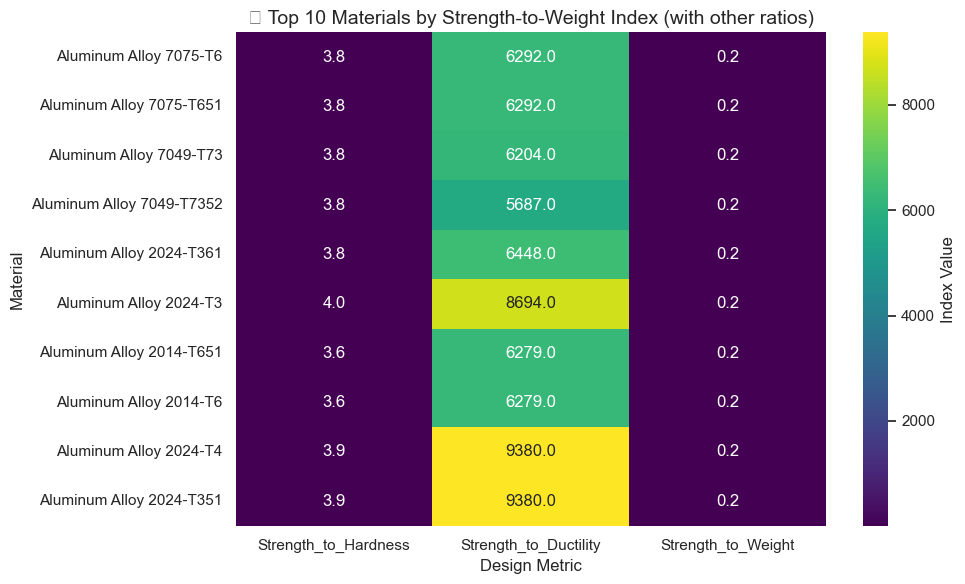

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select top N for visualization
top_materials = ranked_by_weight.head(10).set_index('Material')

# Create a heatmap of all three ratios
plt.figure(figsize=(10, 6))
sns.heatmap(top_materials[['Strength_to_Hardness', 
                           'Strength_to_Ductility', 
                           'Strength_to_Weight']],
            annot=True, cmap='viridis', fmt=".1f", cbar_kws={'label': 'Index Value'})
plt.title("üåü Top 10 Materials by Strength-to-Weight Index (with other ratios)", fontsize=14)
plt.ylabel("Material")
plt.xlabel("Design Metric")
plt.tight_layout()
plt.show()


## üîç **Key Observations from the Heatmap**

### 1. **Consistency in Strength-to-Weight Ratio (Su / Ro)**
- All materials have a **Strength-to-Weight index ‚âà 0.2** ‚Äî nearly identical across the board.
- üîß **Engineering Insight:** These aluminum alloys offer **very similar structural efficiency per unit weight**, making them excellent candidates for **weight-sensitive applications** (e.g., aerospace, automotive).

---

### 2. **Variation in Strength-to-Ductility (Su √ó A5)**
- There‚Äôs a wide spread in the **Strength-to-Ductility index**, from around **5600 to 9380**.
- üîß **Engineering Insight:** Some alloys (like **2024-T4** and **2024-T351**) show **superior toughness**, meaning they maintain high strength **and** deformability ‚Äî crucial in **crash-critical components** or fatigue-prone environments.

---

### 3. **Strength-to-Hardness (Su / Bhn) is Modestly Differentiated**
- Mostly between **3.6 and 4.0**, with slight edge for **2024-T3**.
- üîß **Engineering Insight:** This suggests **similar resistance to wear per unit strength**, but 2024-T3 may handle **surface stress slightly better**. Good for **riveted or bolted structures** where localized hardness matters.

---

## üéØ **How to Use This Insight**

| Design Goal                    | Best Candidate(s)        | Why                                                   |
|-------------------------------|--------------------------|--------------------------------------------------------|
| Lightweight structure         | Any (all ‚âà 0.2 Su/Ro)     | Excellent strength-to-weight across the board          |
| Ductility + strength (tough)  | 2024-T4 / 2024-T351       | Highest Su √ó A5 values                                 |
| Surface contact or wear zones | 2024-T3                   | Slightly better Su/Bhn ‚Üí better for fasteners/joints   |

---

## üöÄ Engineering Application Areas
- **Aerospace fuselage panels:** Go for **2024-T351** ‚Äî strong, tough, and light.
- **Automotive crash structures:** **2024-T4** or **7075-T6** offer strength with decent ductility.
- **Bike frames, tools:** If minimal deformation is acceptable, **7075-T651** gives rigidity and strength.


C:\Users\jaiku\AppData\Local\Temp\ipykernel_23916\2550785388.py:51: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\jaiku\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


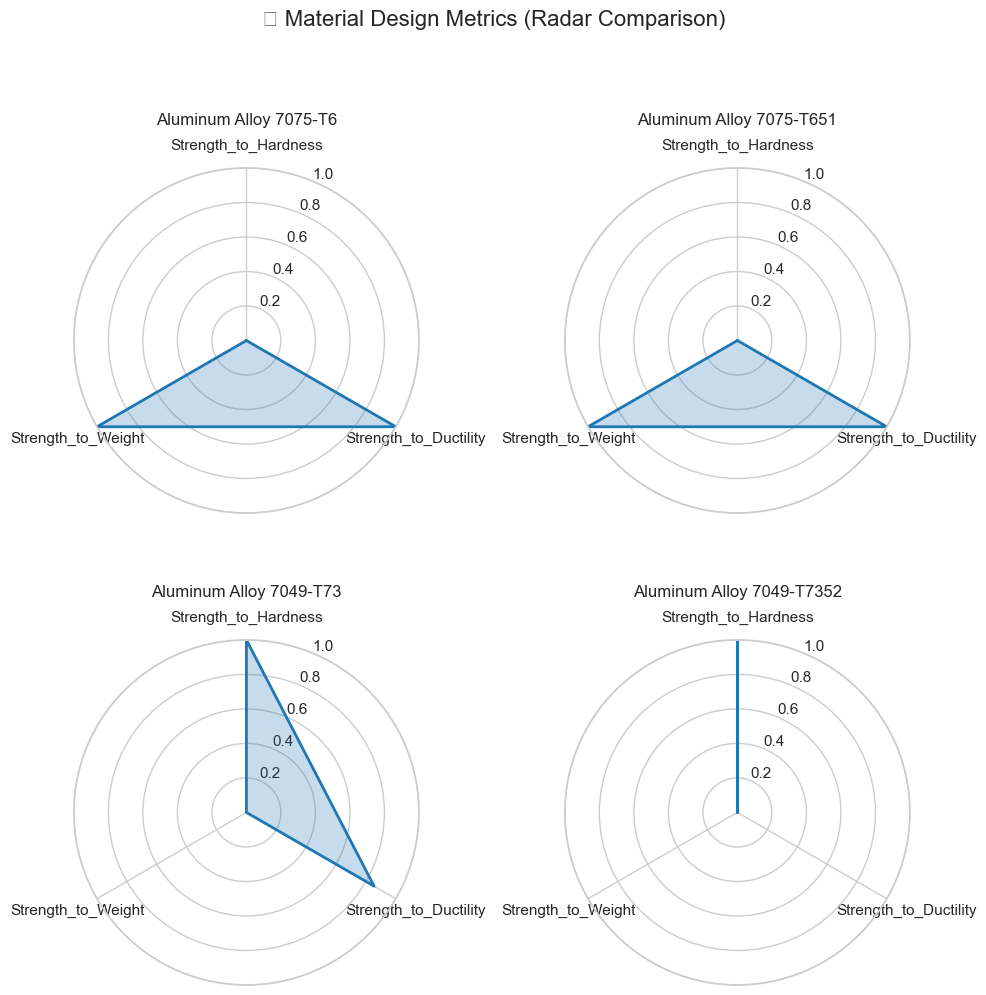

In [29]:

import matplotlib.pyplot as plt
import numpy as np
import math

# Normalize function
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Select top N materials
top_n = 4  # change to however many you want
top_materials = ranked_by_weight.head(top_n).copy()

# Normalize selected metrics
metrics = ['Strength_to_Hardness', 'Strength_to_Ductility', 'Strength_to_Weight']
top_materials[metrics] = top_materials[metrics].apply(normalize)

# Radar chart setup
labels = metrics
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # loop to close

# Grid size for subplots
ncols = 2
nrows = math.ceil(top_n / ncols)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, subplot_kw=dict(polar=True), figsize=(10, 5 * nrows))

# Flatten axes array for easy indexing
axs = axs.flatten()

for i, (idx, row) in enumerate(top_materials.iterrows()):
    values = row[metrics].tolist()
    values += values[:1]
    
    ax = axs[i]
    ax.plot(angles, values, color='tab:blue', linewidth=2)
    ax.fill(angles, values, color='tab:blue', alpha=0.25)
    
    ax.set_title(f"{row['Material']}", size=12, pad=10)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_ylim(0, 1)

# Hide any extra empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.suptitle("üìä Material Design Metrics (Radar Comparison)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


Here‚Äôs the formatted markdown version of your engineering insights on material trade-offs:

---

### **Trade-offs Shown in the Plots**  

#### **1. High Strength/Weight & Strength/Ductility vs. High Strength/Hardness**  
- The plots reveal a clear trade-off:  
  - **High Strength-to-Weight** and **Strength-to-Ductility** ratios are inversely related to **Strength-to-Hardness**.  
- **Material Behavior**:  
  - **7075 Alloys**: Excel in Strength/Weight and Strength/Ductility but underperform in Strength/Hardness.  
  - **7049 Alloys**: Excel in Strength/Hardness but perform poorly in the other two ratios.  
- **Key Insight**:  
  > You must prioritize which ratios matter most; **simultaneously maximizing all three is impossible** with these materials.  
  - Choosing **7049** (high Strength/Hardness) means accepting lower Strength/Weight and Strength/Ductility.  

---

#### **2. Maximizing One Ratio vs. Balance (Within 7049 Series)**  
- **7049-T7352**:  
  - Pushes **Strength-to-Hardness ratio to peak (1.0)**.  
  - **Trade-off**:  
    - Extremely low Strength/Ductility and Strength/Weight compared to other alloys (even 7049-T73).  
- **7049-T73**:  
  - Sacrifices some Strength/Hardness for **moderate improvements** in the other two ratios.  
- **Key Insight**:  
  > Extreme optimization of one property ratio **severely compromises others**.  
  - A **balanced approach** (e.g., 7049-T73) may be preferable unless hardness is critical.  

---

### **Markdown Table for Quick Comparison**  
| Alloy        | Strength/Weight | Strength/Ductility | Strength/Hardness |  
|--------------|------------------|---------------------|--------------------|  
| **7075**     | High             | High                | Low                |  
| **7049-T73** | Low-Moderate     | Low-Moderate        | High               |  
| **7049-T7352**| Very Low         | Very Low            | **Peak (1.0)**     |  

---

### **Key Takeaways**  
1. **Material Selection** depends on the **primary performance goal** (e.g., weight savings vs. wear resistance).  
2. **7049-T7352** is ideal for **hardness-critical** applications but suffers in ductility/weight.  
3. **7075** is better for **lightweight, ductile designs** where hardness is secondary.  

